In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("https://query.data.world/s/gb5wjsz5c76sgfyeas22h4loq7syqt")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
100*df.isnull().sum()/df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [34]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
df['Embarked'] = df['Embarked'].fillna('S')

In [9]:
100*df.isnull().sum()/df.shape[0]

Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
SibSp        0.00000
Parch        0.00000
Fare         0.00000
Embarked     0.00000
dtype: float64

In [36]:
# To make all the columns into numerical columns
df['Sex'].replace(['female', 'male'], [0,1], inplace = True)

We are skipping some steps over here
1. I am not converting categorical columns to dummy columns. You should do this.
2. I will not scale the data.

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [37]:
df['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace = True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [38]:
X = df.drop("Survived", axis  = 1)
y = df['Survived']

## Iterative Imputer

In [15]:
# Import
from fancyimpute import IterativeImputer

In [18]:
fancy = IterativeImputer()
X_ii = pd.DataFrame(fancy.fit_transform(X))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [20]:
X_ii.columns = X.columns

In [21]:
X_ii.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,0.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0


In [22]:
100*X_ii.isnull().sum()/X_ii.shape[0]

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Original')

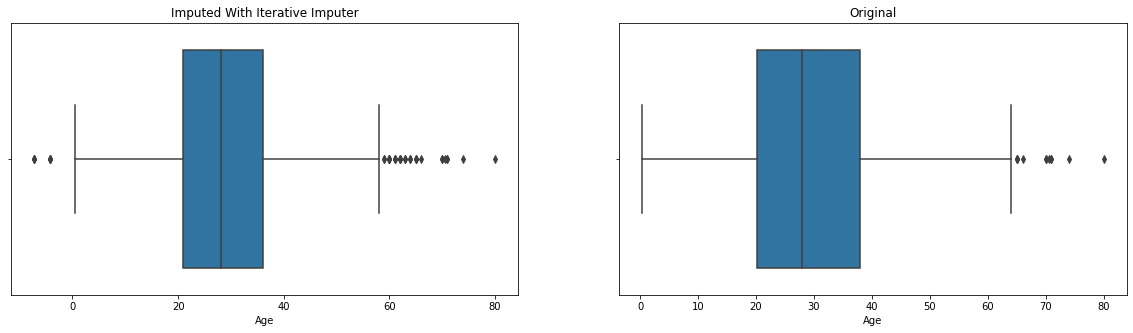

In [25]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(X_ii['Age'])
plt.title("Imputed With Iterative Imputer")

plt.subplot(1,2,2)
sns.boxplot(X['Age'])
plt.title("Original")

In [26]:
# Drop the rows
# Replace them with mean
# Replace them with the min value in the data

## KNN

In [27]:
from fancyimpute import KNN

In [42]:
X_knn = pd.DataFrame(KNN(k=5).fit_transform(X))
X_knn.columns = X.columns
X_knn.head()

Imputing row 1/891 with 0 missing, elapsed time: 0.135
Imputing row 101/891 with 0 missing, elapsed time: 0.137
Imputing row 201/891 with 0 missing, elapsed time: 0.138
Imputing row 301/891 with 1 missing, elapsed time: 0.139
Imputing row 401/891 with 0 missing, elapsed time: 0.140
Imputing row 501/891 with 0 missing, elapsed time: 0.141
Imputing row 601/891 with 0 missing, elapsed time: 0.142
Imputing row 701/891 with 0 missing, elapsed time: 0.143
Imputing row 801/891 with 0 missing, elapsed time: 0.144


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,0.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0


In [30]:
100*X_knn.isnull().sum()/X_knn.shape[0]

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Original')

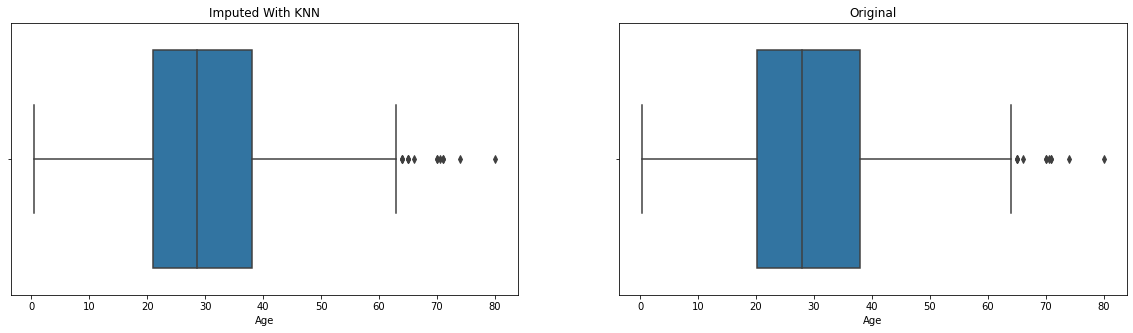

In [31]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(X_knn['Age'])
plt.title("Imputed With KNN")

plt.subplot(1,2,2)
sns.boxplot(X['Age'])
plt.title("Original")

# Data Balancing Techniques

In [40]:
y.value_counts(normalize= True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [41]:
# Load the function from the package
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [43]:
# Random Over Sampling
over  = RandomOverSampler(random_state=0)
X_over, y_over = over.fit_sample(X_knn, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [45]:
pd.Series(y_over).value_counts(normalize = True)

1    0.5
0    0.5
dtype: float64

In [48]:
pd.Series(y_over).value_counts()

1    549
0    549
dtype: int64

In [46]:
# Random Under Sampling
under = RandomUnderSampler(random_state=0)
X_under, y_under = under.fit_resample(X_knn, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [47]:
pd.Series(y_under).value_counts(normalize = True)

1    0.5
0    0.5
dtype: float64

In [49]:
pd.Series(y_under).value_counts()

1    342
0    342
dtype: int64

In [51]:
# SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_knn, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [52]:
pd.Series(y_smote).value_counts(normalize = True)

1    0.5
0    0.5
dtype: float64

In [53]:
pd.Series(y_smote).value_counts()

1    549
0    549
dtype: int64

In [55]:
## Weight of Class

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg  = LogisticRegression(class_weight = 'balanced')
logreg.fit(X_knn, y)

y_pred = logreg.predict(X_knn)

print("Accuracy : ", metrics.accuracy_score(y, y_pred))
print("Recall : ", metrics.recall_score(y, y_pred))

Accuracy :  0.7946127946127947
Recall :  0.7690058479532164


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
